# Exercício 1

/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

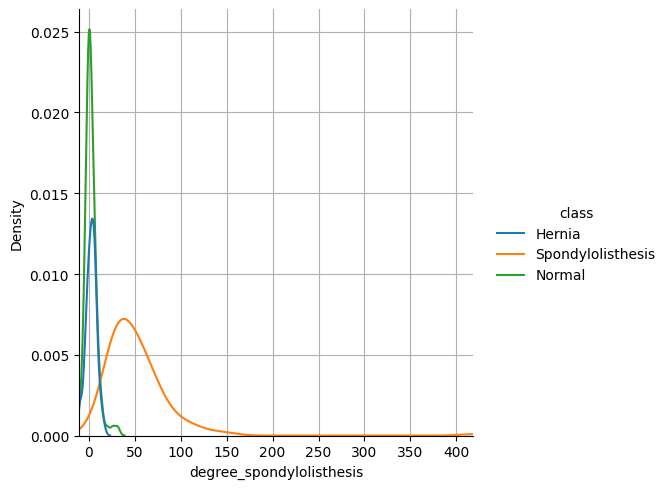

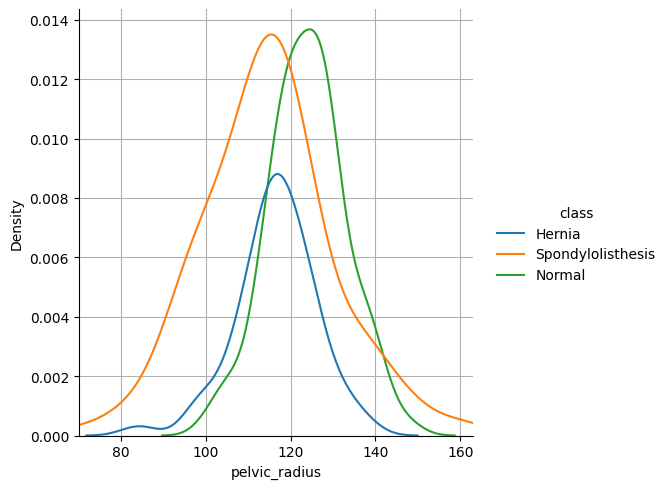

In [1]:
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import  mutual_info_classif

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

fimportance = f_classif(X, y)

variables = list(df.columns.values)
f_scores, p_values = f_classif(X, y)

highest_discriminative_power_index = np.argmax(f_scores)
lowest_discriminative_power_index = np.argmin(f_scores)

maxlim1 = df[variables[highest_discriminative_power_index]].max()
minlim1 = df[variables[highest_discriminative_power_index]].min()
sns.displot(df, x=variables[highest_discriminative_power_index], hue="class", kind="kde")
plt.xlim(minlim1, maxlim1)
plt.grid()

maxlim2 = df[variables[lowest_discriminative_power_index]].max()
minlim2 = df[variables[lowest_discriminative_power_index]].min()
sns.displot(df, x=variables[lowest_discriminative_power_index], hue="class", kind="kde")
plt.xlim(minlim2, maxlim2)
plt.grid()

# Exercício 2

/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

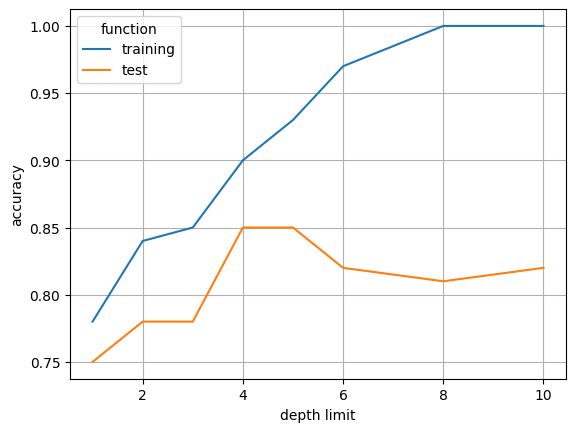

In [2]:
depth_limits = [1,2,3,4,5,6,8,10]
training_accs, test_accs = [], []
X_training, X_test, y_training, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=0)
f_scores = mutual_info_classif(X_training, y_training)

for d in depth_limits:
    avrge_train = 0
    avrge_test = 0
    for i in range (0, 10):
        predictor = tree.DecisionTreeClassifier(max_depth=d)
        predictor.fit(X_training, y_training)
        avrge_train = avrge_train + metrics.accuracy_score(y_training, predictor.predict(X_training))
        avrge_test = avrge_test + metrics.accuracy_score(y_test, predictor.predict(X_test))

    training_accs.append(round(avrge_train/10, 2))
    test_accs.append(round(avrge_test/10, 2))


df1 = pd.DataFrame({'depth limit': depth_limits, 'accuracy': training_accs, 'function': 'training'})
df2 = pd.DataFrame({'depth limit': depth_limits, 'accuracy': test_accs, 'function': 'test'})

df_final = pd.concat([df1, df2])

sns.lineplot(data=df_final, x='depth limit', y='accuracy', hue='function')
plt.grid()

# Exercício 3

According to the plot, previously made, we can see that the testing accuracy is always lower than the training accuracy, this happens because the model tries to recognize patterns present in the train sample, that might not be entirely present in the test sample. Following the increment of the depth limit, we can see that the testing accuracy reaches its peak at 4 and 5, meaning these are the values that make the model (decision tree) generalize better to a different sample than the one that was used to train the model itself. This happens because, the deeper the tree is (more extensive training), the better it gets at predicting outputs for the training sample, i.e. the more overfitted to the training data the model becomes. 

# Exercicio 4

## i)

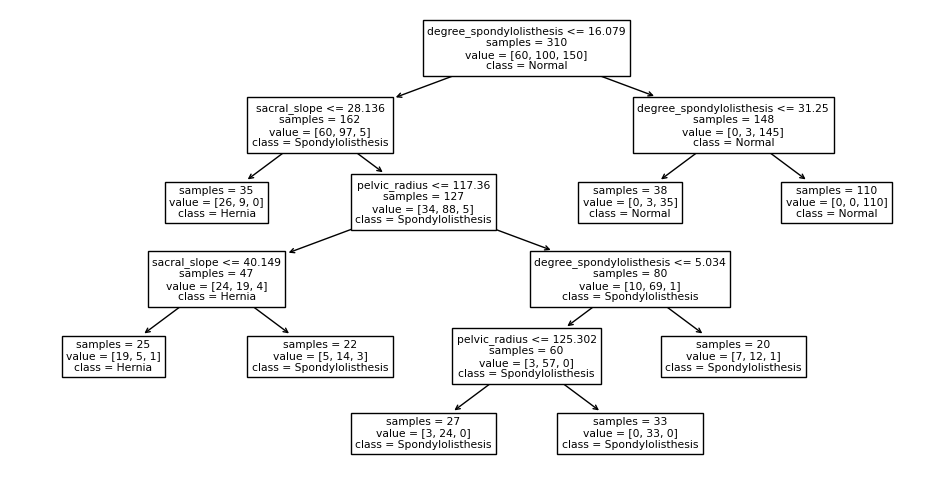

In [3]:
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

class_names = df['class'].unique()
feature_names = list(df.columns.values)

X = df.drop('class', axis=1)
y = df['class']

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20)
predictor.fit(X, y)
figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=feature_names, class_names=class_names, impurity=False)
plt.show()



## ii)

We can characterize a hernia condition by analyzing the decision tree made in the previous task. By doing so, it is visible that, there is a much higher probability of someone having a hernia condition, according to the training sample, if that same person has a degree of spondylolisthesis lower or equal to 16.079, because there is no leaf of the tree with the hernia class in the right side of the tree.  Following down the tree throught the left branch, we can see that, it is almost certain that there is a hernia condition if the sacral slope is lower or equal to 28.136.  But even if this feature is higher, there is still a probability of existing a hernia condition, which can be seen in the tree, if the pelvic radius and the sacral slope, are lower or equal to 117.36 and 40.139, respectively. Based on the results, we can conclude, that the most decisive features are the degree of spondylolisthesis and the sacral slope, accordingly.